<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
flights = pd.read_csv('flights.csv', low_memory=False)
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

# Удаляем строки без нужной информации
flights_mask = flights[['DEPARTURE_DELAY']].isna().any(axis=1)
flights = flights.loc[~flights_mask]

# Анализ задержек вылетов по дням недели

Рассмотрим, как распределяются задержки вылетов по дням недели

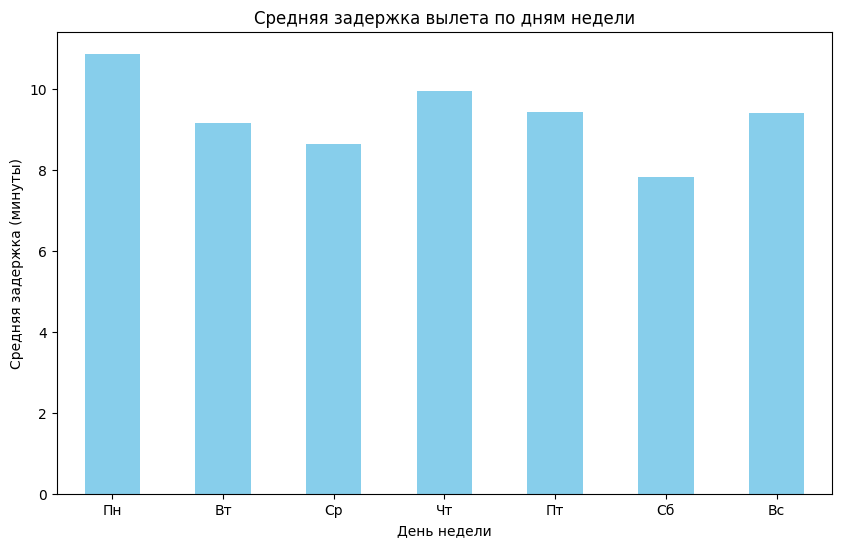

In [46]:

# Группировка данных по дням недели и расчет средней задержки вылета
delays_by_day = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(10, 6))
delays_by_day.plot(kind='bar', color='skyblue')
plt.title('Средняя задержка вылета по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], rotation=0)
plt.show()

Задержки вылетов значительно увеличиваются в понедельник и пятницу, что может быть связано с повышенной нагрузкой на аэропорты в начале и конце рабочей недели.

# Анализ задержек по авиакомпаниям

Выясним, какие авиакомпании имеют наибольшие средние задержки вылетов.

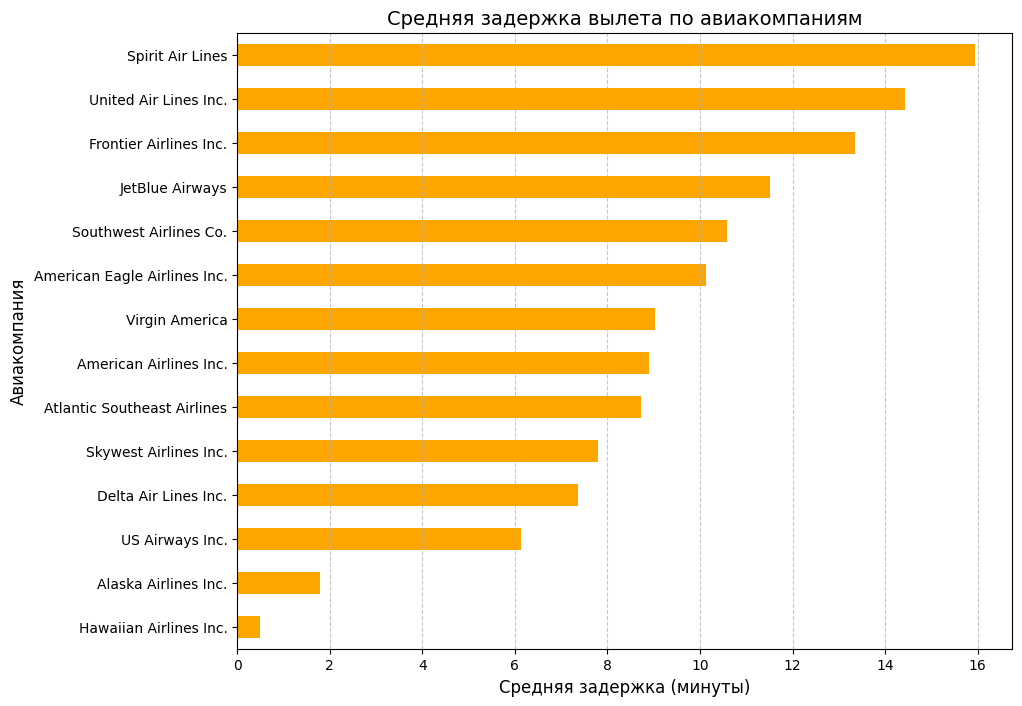

In [48]:
# Присоединение данных с названиями авиакомпаний
flights = flights.rename(columns={'AIRLINE': 'IATA_CODE'})
flights_with_names = pd.merge(flights, airlines, on='IATA_CODE')

# Группировка данных по авиакомпаниям и расчет средней задержки вылета
delays_by_airline = flights_with_names.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values()

plt.figure(figsize=(10, 8))  
delays_by_airline.plot(kind='barh', color='orange') 
plt.title('Средняя задержка вылета по авиакомпаниям', fontsize=14)
plt.xlabel('Средняя задержка (минуты)', fontsize=12)
plt.ylabel('Авиакомпания', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

 Авиакомпании "Spirit Air Lines" и "United Air Lines Inc" имеют наибольшие средние задержки вылетов, что может указывать на проблемы в их операционной деятельности.

# Анализ задержек по времени суток

Как задержки вылетов распределяются по времени суток.

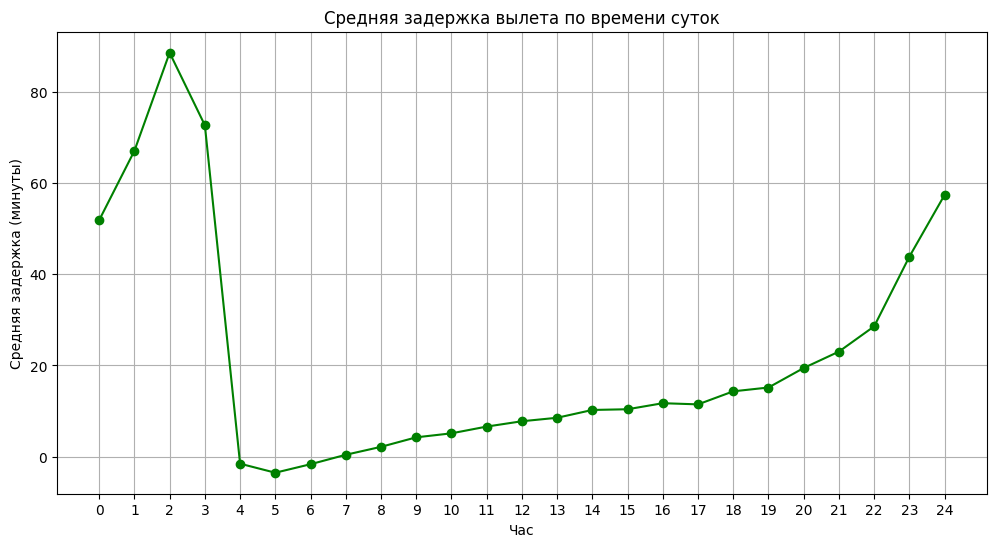

In [50]:
# Группировка данных по часам и расчет средней задержки вылета
flights['HOUR'] = flights['DEPARTURE_TIME'] // 100
delays_by_hour = flights.groupby('HOUR')['DEPARTURE_DELAY'].mean()

# Построение графика
plt.figure(figsize=(12, 6))
delays_by_hour.plot(kind='line', marker='o', color='green')
plt.xticks(range(0, 25)) 
plt.title('Средняя задержка вылета по времени суток')
plt.xlabel('Час')
plt.ylabel('Средняя задержка (минуты)')
plt.grid(True)
plt.show()

Задержки вылетов увеличиваются в утренние и вечерние часы, что может быть связано с пиковой нагрузкой на аэропорты в эти периоды.

# Анализ задержек по аэропортам

Какие аэропорты имеют наибольшие средние задержки вылетов.

In [19]:
# !pip install basemap --user

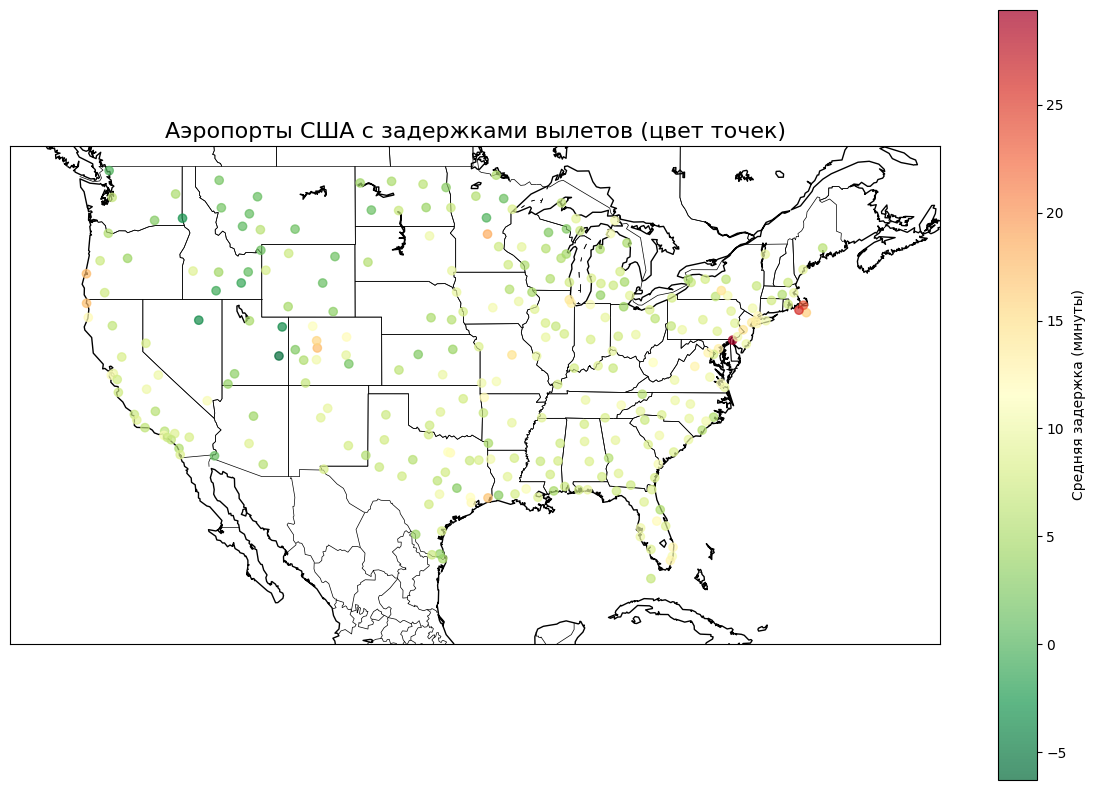

In [52]:

from mpl_toolkits.basemap import Basemap

# Группировка данных по аэропортам и расчет средней задержки вылета
delays_by_airport = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()

# Присоединение данных с названиями аэропортов
flights_with_airports = pd.merge(delays_by_airport, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')


# Создание карты США
plt.figure(figsize=(15, 10))
m = Basemap(
    projection='merc',  # Проекция Меркатора
    llcrnrlat=20,  
    urcrnrlat=50,  
    llcrnrlon=-130,  
    urcrnrlon=-60,  
    resolution='l'  
)

# Отображение границ стран, береговых линий и штатов
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Преобразование координат аэропортов в координаты карты
x, y = m(flights_with_airports['LONGITUDE'].values, flights_with_airports['LATITUDE'].values)

# Отображение аэропортов на карте с цветовой шкалой
scatter = m.scatter(x, y, c=flights_with_airports['DEPARTURE_DELAY'], cmap='RdYlGn_r', alpha=0.7, zorder=5)

# Добавление цветовой легенды
cbar = plt.colorbar(scatter, label='Средняя задержка (минуты)')

plt.title('Аэропорты США с задержками вылетов (цвет точек)', fontsize=16)
plt.show()

Благодаря наглядному представлению зависимости средней задержки вылетов от расположения на карте можно сделать выводы в каких регионах есть проблемы с организацией и инфраструктурой.

# Анализ задержек по месяцам

Рассмотрим распределение задержек вылетов по месяцам.

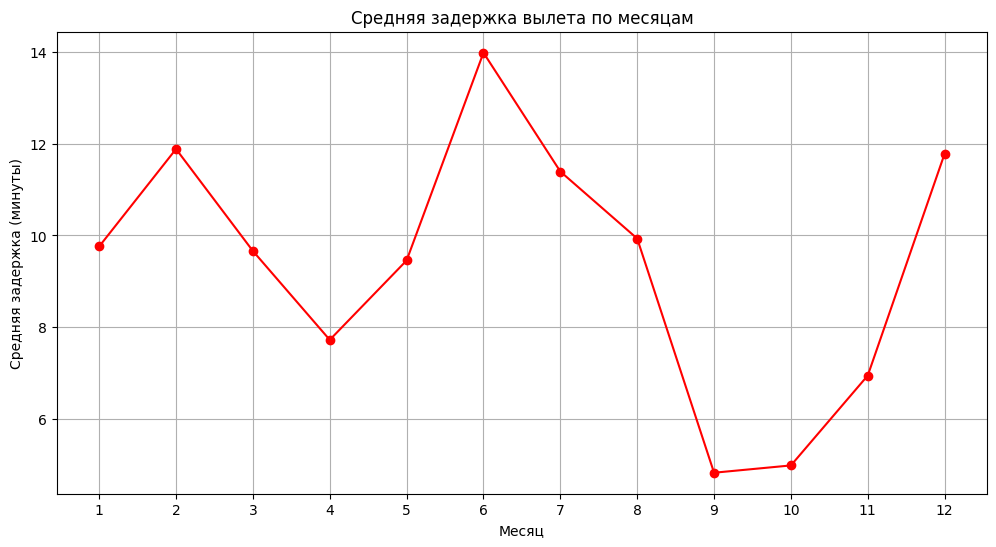

In [54]:
# Группировка данных по месяцам и расчет средней задержки вылета
delays_by_month = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()

# Построение графика
plt.figure(figsize=(12, 6))
delays_by_month.plot(kind='line', marker='o', color='red')
plt.title('Средняя задержка вылета по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(range(1, 13)) 
plt.grid(True)
plt.show()

Задержки вылетов увеличиваются в летние месяцы, что может быть связано с увеличением количества рейсов и пассажиров в этот период.